<a href="https://colab.research.google.com/github/MuhammadIrzam447/MultiModel/blob/master/Valid_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import os
from PIL import Image
import torch
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
import torchvision
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import UnidentifiedImageError
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [3]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Loading Validation Dataset and Preprocessing

In [4]:
# save_dir = '/content/Model/Fused_ResNetmodel_Hatefull_Experiment#5'
# load_path = os.path.join(save_dir, 'model.pth')

# # Create an instance of the ResNet model
# resnet = torchvision.models.resnet101(pretrained=False)
# resnet.fc = nn.Linear(2048, 2) # Choose the number of output classses as per your model

# # Load the saved model parameters
# # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
# resnet.load_state_dict(torch.load(load_path))

# # Set the model to evaluation mode and respective device
# resnet.eval()
# resnet.to(device)

In [5]:
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
class ValidationDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.dataset = datasets.ImageFolder(data_dir, transform=val_transform)
        self.classes = sorted(os.listdir(data_dir))
        self.class_lengths = self._compute_class_lengths()

    def _compute_class_lengths(self):
        class_lengths = {cls: 0 for cls in self.classes}

        for cls in self.classes:
            cls_dir = os.path.join(self.data_dir, cls)
            if os.path.isdir(cls_dir):
                class_lengths[cls] = len(os.listdir(cls_dir))

        return class_lengths

    def __getitem__(self, index):
        image, label = self.dataset[index]
        return image, label

    def __len__(self):
        return len(self.dataset)

In [7]:
valPath = "/content/Dataset(s)/fused-ferramenta-val"
val_dataset = ValidationDataset(valPath)

In [8]:
batch_size = 32
validation_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [9]:
print("Number of samples:", len(val_dataset))
print("Number of classes:", len(val_dataset.classes))

Number of samples: 21869
Number of classes: 52


In [10]:
num_batches = len(validation_data_loader)
print("Number of batches:", num_batches)

Number of batches: 684


# Validation

In [11]:
epoch = 1
save_dir = '/content/Model/Models-Train-05/'
while epoch < 20:
    model_name = str(epoch+1) + "_model.pth"
    load_path = os.path.join(save_dir, model_name)

    # Create an instance of the ResNet model
    resnet = torchvision.models.resnet101(pretrained=False)
    resnet.fc = nn.Linear(2048, 52) # Choose the number of output classses as per your model

    # Load the saved model parameters
    # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
    resnet.load_state_dict(torch.load(load_path))

    # Set the model to evaluation mode and respective device
    resnet.eval()
    resnet.to(device)

    # resnet.eval()

    predicted_classes = []
    actual_labels = []

    with torch.no_grad():
        for images, labels in validation_data_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = resnet(images)

            # Get the predicted labels
            _, predicted_label = torch.max(outputs, 1)

            # Store the predicted and true labels
            predicted_classes.extend(predicted_label.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

        accuracy = accuracy_score(actual_labels, predicted_classes)
        precision = precision_score(actual_labels, predicted_classes, average='weighted')
        recall = recall_score(actual_labels, predicted_classes, average='weighted')
        f1 = f1_score(actual_labels, predicted_classes, average='weighted')

        print("Result with model " + model_name + " : ")
        print("=========================================")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print(classification_report(actual_labels, predicted_classes))

        predicted_classes = np.array(predicted_classes)
        actual_labels = np.array(actual_labels)

        # Calculate the AUROC score
        # auroc = roc_auc_score(actual_labels, predicted_classes)
        # print("AUROC:", auroc)
        epoch = epoch + 1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 2_model.pth : 
Accuracy: 0.9341076409529471
Precision: 0.933879544651682
Recall: 0.9341076409529471
F1-score: 0.9328090787923178
              precision    recall  f1-score   support

           0       0.61      0.47      0.53        59
           1       0.95      0.98      0.97      1879
           2       0.94      0.99      0.96       345
           3       1.00      0.98      0.99        48
           4       0.94      0.97      0.96       132
           5       0.87      0.86      0.87       176
           6       0.96      0.98      0.97      1069
           7       0.92      0.95      0.93       148
           8       0.95      0.98      0.97       663
           9       0.98      0.99      0.99       642
          10       0.89      0.91      0.90       136
          11       0.83      0.86      0.85        35
          12       0.79      0.80      0.80       112
          13       0.93      0.97      0.95       842
          14       0.97      0.98      0.9

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 3_model.pth : 
Accuracy: 0.942750011431707
Precision: 0.9428752899975246
Recall: 0.942750011431707
F1-score: 0.9422396959583773
              precision    recall  f1-score   support

           0       0.62      0.49      0.55        59
           1       0.95      0.98      0.97      1879
           2       0.97      0.97      0.97       345
           3       1.00      0.98      0.99        48
           4       0.94      0.95      0.95       132
           5       0.89      0.86      0.88       176
           6       0.97      0.99      0.98      1069
           7       0.92      0.95      0.93       148
           8       0.95      0.98      0.97       663
           9       0.97      0.99      0.98       642
          10       0.89      0.91      0.90       136
          11       0.91      0.83      0.87        35
          12       0.80      0.90      0.85       112
          13       0.95      0.96      0.95       842
          14       0.97      0.98      0.98

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 4_model.pth : 
Accuracy: 0.9477342356760712
Precision: 0.9479074430124746
Recall: 0.9477342356760712
F1-score: 0.9471414192811223
              precision    recall  f1-score   support

           0       0.72      0.56      0.63        59
           1       0.97      0.97      0.97      1879
           2       0.96      0.98      0.97       345
           3       1.00      0.98      0.99        48
           4       0.94      0.98      0.96       132
           5       0.90      0.88      0.89       176
           6       0.95      0.99      0.97      1069
           7       0.96      0.93      0.95       148
           8       0.96      0.98      0.97       663
           9       0.99      0.99      0.99       642
          10       0.91      0.91      0.91       136
          11       0.91      0.89      0.90        35
          12       0.81      0.94      0.87       112
          13       0.97      0.95      0.96       842
          14       0.97      0.98      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 5_model.pth : 
Accuracy: 0.9498833965887786
Precision: 0.9504639071209984
Recall: 0.9498833965887786
F1-score: 0.9499050363230809
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        59
           1       0.98      0.97      0.97      1879
           2       0.97      0.99      0.98       345
           3       0.94      0.98      0.96        48
           4       0.94      1.00      0.97       132
           5       0.93      0.86      0.89       176
           6       0.98      0.98      0.98      1069
           7       0.96      0.95      0.95       148
           8       0.97      0.98      0.98       663
           9       0.99      1.00      0.99       642
          10       0.88      0.91      0.90       136
          11       1.00      0.86      0.92        35
          12       0.89      0.88      0.88       112
          13       0.96      0.96      0.96       842
          14       0.97      0.98      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 6_model.pth : 
Accuracy: 0.9475056015364214
Precision: 0.9478832257837795
Recall: 0.9475056015364214
F1-score: 0.9468803396713766
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        59
           1       0.98      0.98      0.98      1879
           2       0.97      0.97      0.97       345
           3       1.00      0.96      0.98        48
           4       0.93      0.99      0.96       132
           5       0.89      0.88      0.88       176
           6       0.98      0.99      0.98      1069
           7       0.93      0.93      0.93       148
           8       0.93      0.99      0.96       663
           9       0.99      0.99      0.99       642
          10       0.91      0.93      0.92       136
          11       0.94      0.91      0.93        35
          12       0.82      0.88      0.85       112
          13       0.96      0.96      0.96       842
          14       0.97      0.99      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 7_model.pth : 
Accuracy: 0.9527184599204354
Precision: 0.9532470094327888
Recall: 0.9527184599204354
F1-score: 0.9524371058955781
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        59
           1       0.97      0.98      0.97      1879
           2       0.96      0.98      0.97       345
           3       0.90      0.98      0.94        48
           4       0.95      0.98      0.97       132
           5       0.88      0.90      0.89       176
           6       0.97      0.98      0.98      1069
           7       0.91      0.95      0.93       148
           8       0.98      0.97      0.98       663
           9       0.98      0.99      0.99       642
          10       0.88      0.95      0.91       136
          11       0.97      0.89      0.93        35
          12       0.83      0.91      0.87       112
          13       0.97      0.97      0.97       842
          14       0.97      0.99      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 8_model.pth : 
Accuracy: 0.9535872696511043
Precision: 0.9537759140121653
Recall: 0.9535872696511043
F1-score: 0.9533698752536661
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        59
           1       0.98      0.97      0.98      1879
           2       0.97      0.97      0.97       345
           3       0.98      0.98      0.98        48
           4       0.96      0.98      0.97       132
           5       0.89      0.91      0.90       176
           6       0.97      0.98      0.98      1069
           7       0.93      0.94      0.93       148
           8       0.97      0.98      0.97       663
           9       0.99      0.99      0.99       642
          10       0.84      0.96      0.89       136
          11       0.94      0.86      0.90        35
          12       0.86      0.92      0.89       112
          13       0.95      0.97      0.96       842
          14       0.98      0.98      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 9_model.pth : 
Accuracy: 0.953861630618684
Precision: 0.9540955459597061
Recall: 0.953861630618684
F1-score: 0.9537088607588546
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        59
           1       0.97      0.98      0.98      1879
           2       0.98      0.96      0.97       345
           3       0.96      0.98      0.97        48
           4       0.96      0.96      0.96       132
           5       0.90      0.89      0.89       176
           6       0.97      0.98      0.97      1069
           7       0.93      0.96      0.94       148
           8       0.97      0.98      0.97       663
           9       0.98      0.99      0.99       642
          10       0.91      0.93      0.92       136
          11       0.97      0.89      0.93        35
          12       0.91      0.86      0.88       112
          13       0.97      0.96      0.97       842
          14       0.98      0.98      0.98

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 10_model.pth : 
Accuracy: 0.9545932598655631
Precision: 0.9550986575745355
Recall: 0.9545932598655631
F1-score: 0.9545207147481644
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        59
           1       0.97      0.98      0.98      1879
           2       0.98      0.98      0.98       345
           3       0.94      0.98      0.96        48
           4       0.93      1.00      0.96       132
           5       0.91      0.89      0.90       176
           6       0.97      0.99      0.98      1069
           7       0.93      0.94      0.94       148
           8       0.98      0.98      0.98       663
           9       0.99      1.00      0.99       642
          10       0.94      0.91      0.93       136
          11       0.96      0.74      0.84        35
          12       0.84      0.91      0.88       112
          13       0.96      0.96      0.96       842
          14       0.97      0.98      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 11_model.pth : 
Accuracy: 0.9560565183593214
Precision: 0.9557848131637952
Recall: 0.9560565183593214
F1-score: 0.9557225572549392
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        59
           1       0.97      0.98      0.98      1879
           2       0.97      0.98      0.98       345
           3       0.96      1.00      0.98        48
           4       0.93      0.98      0.96       132
           5       0.92      0.88      0.90       176
           6       0.98      0.99      0.98      1069
           7       0.93      0.96      0.94       148
           8       0.97      0.98      0.97       663
           9       0.99      0.99      0.99       642
          10       0.94      0.96      0.95       136
          11       0.97      0.83      0.89        35
          12       0.87      0.94      0.90       112
          13       0.96      0.97      0.97       842
          14       0.97      0.99      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 12_model.pth : 
Accuracy: 0.9553706159403722
Precision: 0.955210574281496
Recall: 0.9553706159403722
F1-score: 0.9550934404401215
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        59
           1       0.97      0.99      0.98      1879
           2       0.97      0.98      0.98       345
           3       0.89      1.00      0.94        48
           4       0.93      1.00      0.96       132
           5       0.91      0.86      0.89       176
           6       0.97      0.99      0.98      1069
           7       0.95      0.96      0.95       148
           8       0.97      0.98      0.98       663
           9       0.98      0.99      0.99       642
          10       0.92      0.96      0.94       136
          11       0.94      0.89      0.91        35
          12       0.89      0.90      0.89       112
          13       0.97      0.96      0.97       842
          14       0.97      0.99      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 13_model.pth : 
Accuracy: 0.9537244501348942
Precision: 0.9539835664552087
Recall: 0.9537244501348942
F1-score: 0.9533926698190198
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        59
           1       0.97      0.98      0.97      1879
           2       0.96      0.99      0.97       345
           3       0.98      1.00      0.99        48
           4       0.94      0.99      0.96       132
           5       0.91      0.91      0.91       176
           6       0.98      0.99      0.98      1069
           7       0.97      0.93      0.95       148
           8       0.98      0.97      0.98       663
           9       0.98      0.99      0.99       642
          10       0.90      0.95      0.92       136
          11       0.89      0.89      0.89        35
          12       0.85      0.93      0.89       112
          13       0.97      0.96      0.97       842
          14       0.97      0.99      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 14_model.pth : 
Accuracy: 0.9543646257259134
Precision: 0.9547729626043268
Recall: 0.9543646257259134
F1-score: 0.9543481562636313
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        59
           1       0.98      0.97      0.98      1879
           2       0.96      0.99      0.97       345
           3       0.98      0.98      0.98        48
           4       0.96      0.99      0.97       132
           5       0.92      0.88      0.90       176
           6       0.97      0.98      0.98      1069
           7       0.94      0.95      0.94       148
           8       0.97      0.98      0.97       663
           9       0.99      0.99      0.99       642
          10       0.87      0.96      0.92       136
          11       0.91      0.89      0.90        35
          12       0.92      0.89      0.90       112
          13       0.98      0.96      0.97       842
          14       0.97      0.99      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 15_model.pth : 
Accuracy: 0.9553706159403722
Precision: 0.9551825031725469
Recall: 0.9553706159403722
F1-score: 0.9550706585068096
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        59
           1       0.97      0.98      0.98      1879
           2       0.96      0.99      0.97       345
           3       0.98      0.98      0.98        48
           4       0.95      0.99      0.97       132
           5       0.95      0.88      0.91       176
           6       0.98      0.98      0.98      1069
           7       0.94      0.95      0.94       148
           8       0.96      0.98      0.97       663
           9       0.99      0.99      0.99       642
          10       0.90      0.96      0.93       136
          11       0.94      0.91      0.93        35
          12       0.88      0.92      0.90       112
          13       0.97      0.96      0.97       842
          14       0.97      0.99      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 16_model.pth : 
Accuracy: 0.9573825963692899
Precision: 0.957245146293909
Recall: 0.9573825963692899
F1-score: 0.9571387782917399
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        59
           1       0.98      0.98      0.98      1879
           2       0.97      0.98      0.97       345
           3       0.94      0.98      0.96        48
           4       0.95      1.00      0.97       132
           5       0.91      0.90      0.91       176
           6       0.98      0.99      0.98      1069
           7       0.94      0.95      0.95       148
           8       0.97      0.97      0.97       663
           9       0.98      0.99      0.99       642
          10       0.89      0.96      0.92       136
          11       0.94      0.89      0.91        35
          12       0.91      0.91      0.91       112
          13       0.95      0.97      0.96       842
          14       0.98      0.98      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 17_model.pth : 
Accuracy: 0.9567881476062006
Precision: 0.9567258143528492
Recall: 0.9567881476062006
F1-score: 0.9565673222520971
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        59
           1       0.98      0.98      0.98      1879
           2       0.97      0.99      0.98       345
           3       0.96      0.98      0.97        48
           4       0.94      1.00      0.97       132
           5       0.91      0.88      0.89       176
           6       0.97      0.99      0.98      1069
           7       0.91      0.95      0.93       148
           8       0.97      0.98      0.98       663
           9       0.99      0.99      0.99       642
          10       0.90      0.96      0.93       136
          11       0.94      0.94      0.94        35
          12       0.87      0.91      0.89       112
          13       0.96      0.98      0.97       842
          14       0.97      0.99      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 18_model.pth : 
Accuracy: 0.9563308793269011
Precision: 0.9562430955741676
Recall: 0.9563308793269011
F1-score: 0.9560602682390897
              precision    recall  f1-score   support

           0       0.61      0.66      0.63        59
           1       0.97      0.98      0.98      1879
           2       0.96      0.99      0.97       345
           3       0.96      0.98      0.97        48
           4       0.94      0.98      0.96       132
           5       0.90      0.90      0.90       176
           6       0.97      0.98      0.98      1069
           7       0.93      0.95      0.94       148
           8       0.98      0.98      0.98       663
           9       0.99      0.99      0.99       642
          10       0.90      0.96      0.93       136
          11       0.97      0.91      0.94        35
          12       0.87      0.91      0.89       112
          13       0.96      0.97      0.97       842
          14       0.98      0.99      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 19_model.pth : 
Accuracy: 0.95719968905757
Precision: 0.9570300465816065
Recall: 0.95719968905757
F1-score: 0.9568594236897885
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        59
           1       0.97      0.98      0.98      1879
           2       0.98      0.98      0.98       345
           3       0.96      0.98      0.97        48
           4       0.93      0.99      0.96       132
           5       0.92      0.89      0.91       176
           6       0.97      0.99      0.98      1069
           7       0.93      0.95      0.94       148
           8       0.97      0.98      0.97       663
           9       0.99      1.00      0.99       642
          10       0.91      0.95      0.93       136
          11       0.91      0.91      0.91        35
          12       0.82      0.93      0.87       112
          13       0.97      0.97      0.97       842
          14       0.98      0.99      0.98 

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 20_model.pth : 
Accuracy: 0.9579313183044492
Precision: 0.9579188361769293
Recall: 0.9579313183044492
F1-score: 0.9576794867886653
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        59
           1       0.98      0.98      0.98      1879
           2       0.98      0.98      0.98       345
           3       0.98      0.98      0.98        48
           4       0.93      0.99      0.96       132
           5       0.90      0.89      0.89       176
           6       0.97      0.99      0.98      1069
           7       0.94      0.95      0.95       148
           8       0.96      0.98      0.97       663
           9       0.98      1.00      0.99       642
          10       0.94      0.96      0.95       136
          11       0.91      0.91      0.91        35
          12       0.84      0.95      0.89       112
          13       0.97      0.97      0.97       842
          14       0.97      0.99      0

In [12]:
accuracy = accuracy_score(actual_labels, predicted_classes)
precision = precision_score(actual_labels, predicted_classes, average='weighted')
recall = recall_score(actual_labels, predicted_classes, average='weighted')
f1 = f1_score(actual_labels, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9579313183044492
Precision: 0.9579188361769293
Recall: 0.9579313183044492
F1-score: 0.9576794867886653


In [13]:
print(classification_report(actual_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        59
           1       0.98      0.98      0.98      1879
           2       0.98      0.98      0.98       345
           3       0.98      0.98      0.98        48
           4       0.93      0.99      0.96       132
           5       0.90      0.89      0.89       176
           6       0.97      0.99      0.98      1069
           7       0.94      0.95      0.95       148
           8       0.96      0.98      0.97       663
           9       0.98      1.00      0.99       642
          10       0.94      0.96      0.95       136
          11       0.91      0.91      0.91        35
          12       0.84      0.95      0.89       112
          13       0.97      0.97      0.97       842
          14       0.97      0.99      0.98      1555
          15       0.90      0.75      0.82        36
          16       0.96      0.94      0.95        51
          17       0.93    

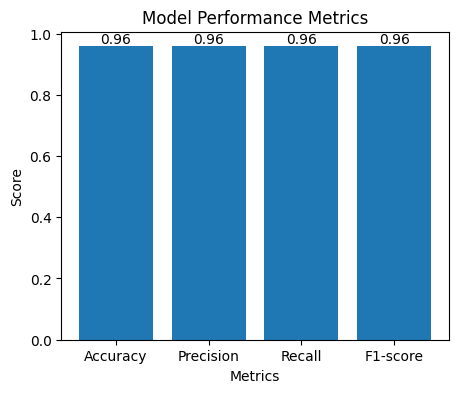

In [14]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(x, values)

# labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# scores on top of each bar
for i, bar in enumerate(bars):
    score = values[i]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()

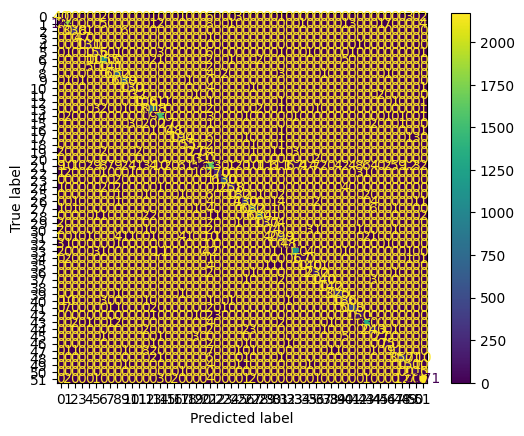

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_labels, predicted_classes)
ConfusionMatrixDisplay(cm).plot()

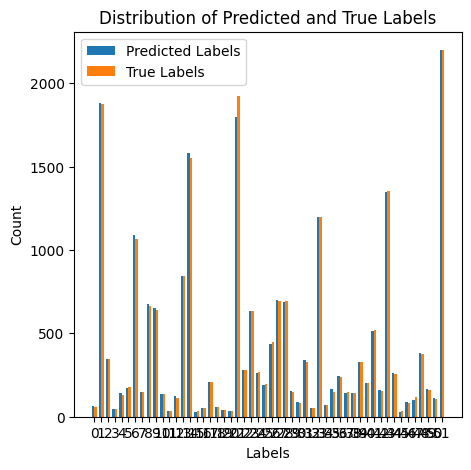

In [16]:
# Count the occurrences of each label in predicted and true labels
predicted_counts = np.bincount(predicted_classes)
true_counts = np.bincount(actual_labels)

# Get the unique labels
labels = np.unique(np.concatenate((predicted_classes, actual_labels)))

# Set the x-axis range
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35

# Plot the predicted and true label counts
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x - width/2, predicted_counts, width, label='Predicted Labels')
ax.bar(x + width/2, true_counts, width, label='True Labels')

# Add labels, title, and legend
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Predicted and True Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()